# Cel:
Zrozumienie zaleznosci pomiędzy obrazem i jego spektrum.

*Spektrum* - wyświetlalna transformata Fouriera obrazu. W praktyce - logarytmy z modułów poszczególnych wartości transformaty, która ma w sobie liczby urojone.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.io import imread

from notebooks.utils.ploting import plot_spectrum_transformations, plot_spectrum_transformations_compact, \
    play_with_source_image
from notebooks.utils.transformations import get_circle_transformation, compose_transformations, \
    get_vertical_bar_transformation, get_horizontal_bar_transformation, get_rotated_bar_transformation, get_crop_transformation

In [2]:
image = imread('../images/id_borkowski.jpg')

In [3]:
type(image)

numpy.ndarray

In [4]:
image.shape

(532, 533, 3)

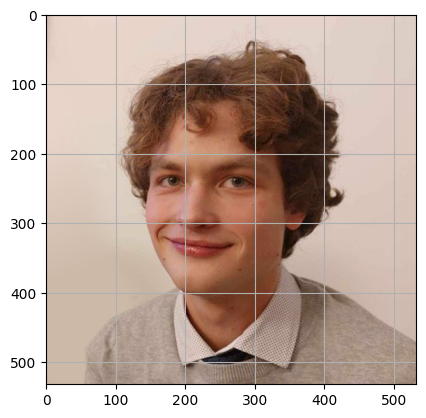

In [5]:
plt.imshow(image)
plt.grid(None)
plt.show()

### Uwaga urojenia

In [6]:
#image_to_spectrum
spectrum = np.fft.fftshift(np.fft.fft2(image[...,0]))
spectrum[150:152,150:152]

array([[-4754.29161444  +88.52186159j,   835.37360116-3499.88641367j],
       [ 2771.74304361-4906.89453191j,  1894.21912058+2884.47690006j]])

# abs - strata danych

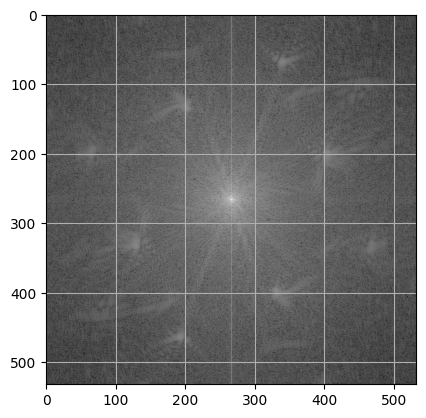

In [7]:
#spectrum_to_plot
epsilon = 1e-10
plottable_spectrum = np.log(abs(spectrum) + epsilon)
plt.imshow(plottable_spectrum, cmap='gray')
plt.grid(None)
plt.show()

Fajna funkcja.

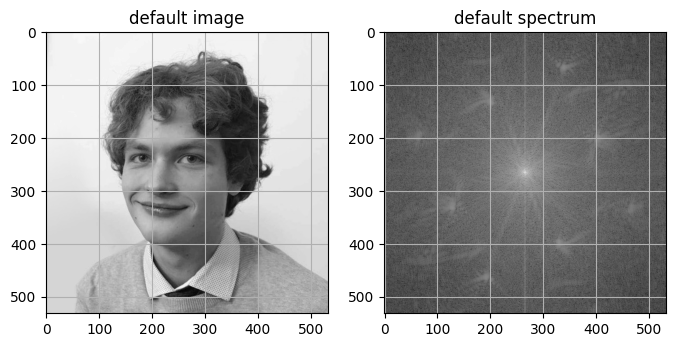

In [8]:
plot_spectrum_transformations(rgb2gray(image))

# Jak reaguje na kolory

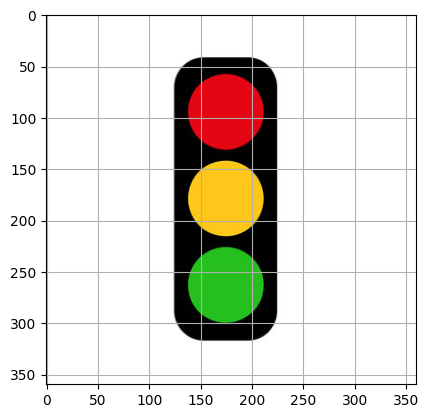

In [9]:
traffic = imread('../images/traffic.jpg')
plt.imshow(traffic)
plt.grid(None)
plt.show()

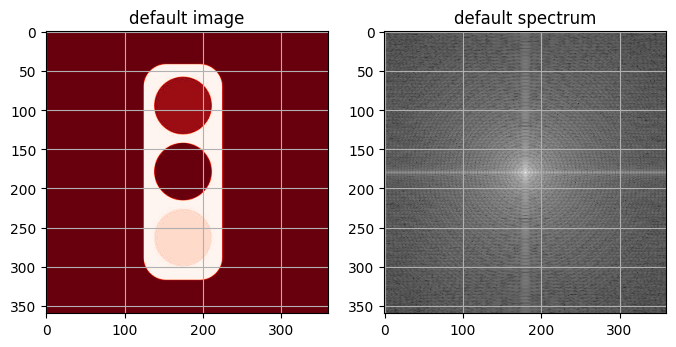

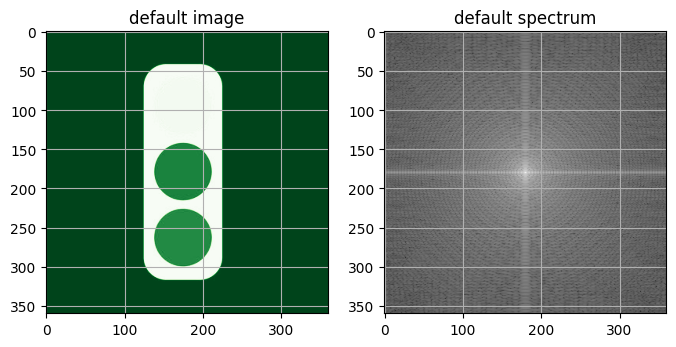

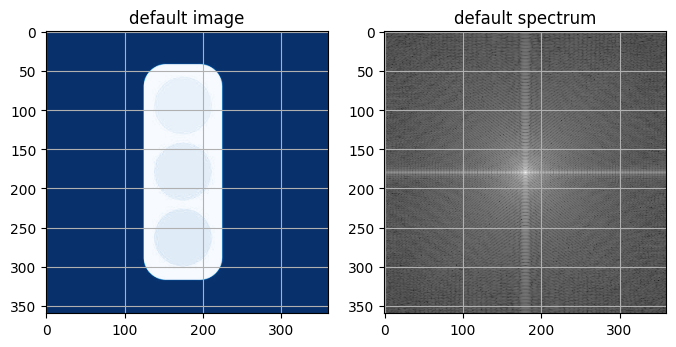

In [10]:
traffic = imread('../images/traffic.jpg')
colors = ['Reds', 'Greens', 'Blues']
for i in range(3):
    plot_spectrum_transformations(traffic[:,:,i], c_map=colors[i])

Ogólnie spektra są podobne, bo przechowują informacje na temat podobnej rzeczy, jaką jest struktura przestrzenna sygnalizatora. Widać jednak pewne różnice, np. środek niebieskiego spektrum wydaje się mniej intensywny od innych.

# Jak modyfikacja obrazu wpłynie na spektrum?

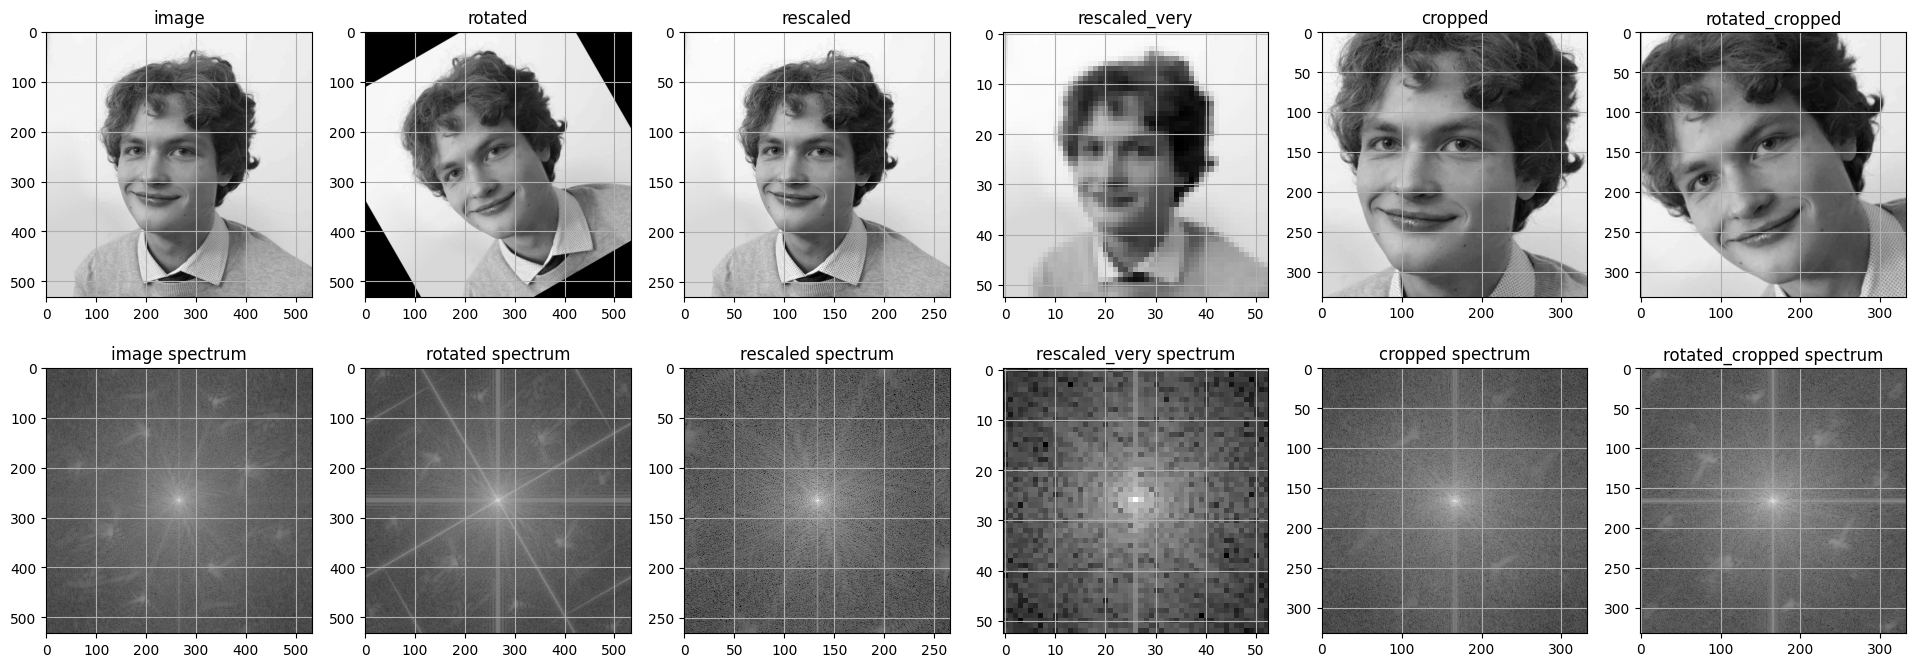

In [13]:
image = imread('../images/id_borkowski.jpg')
play_with_source_image(image)

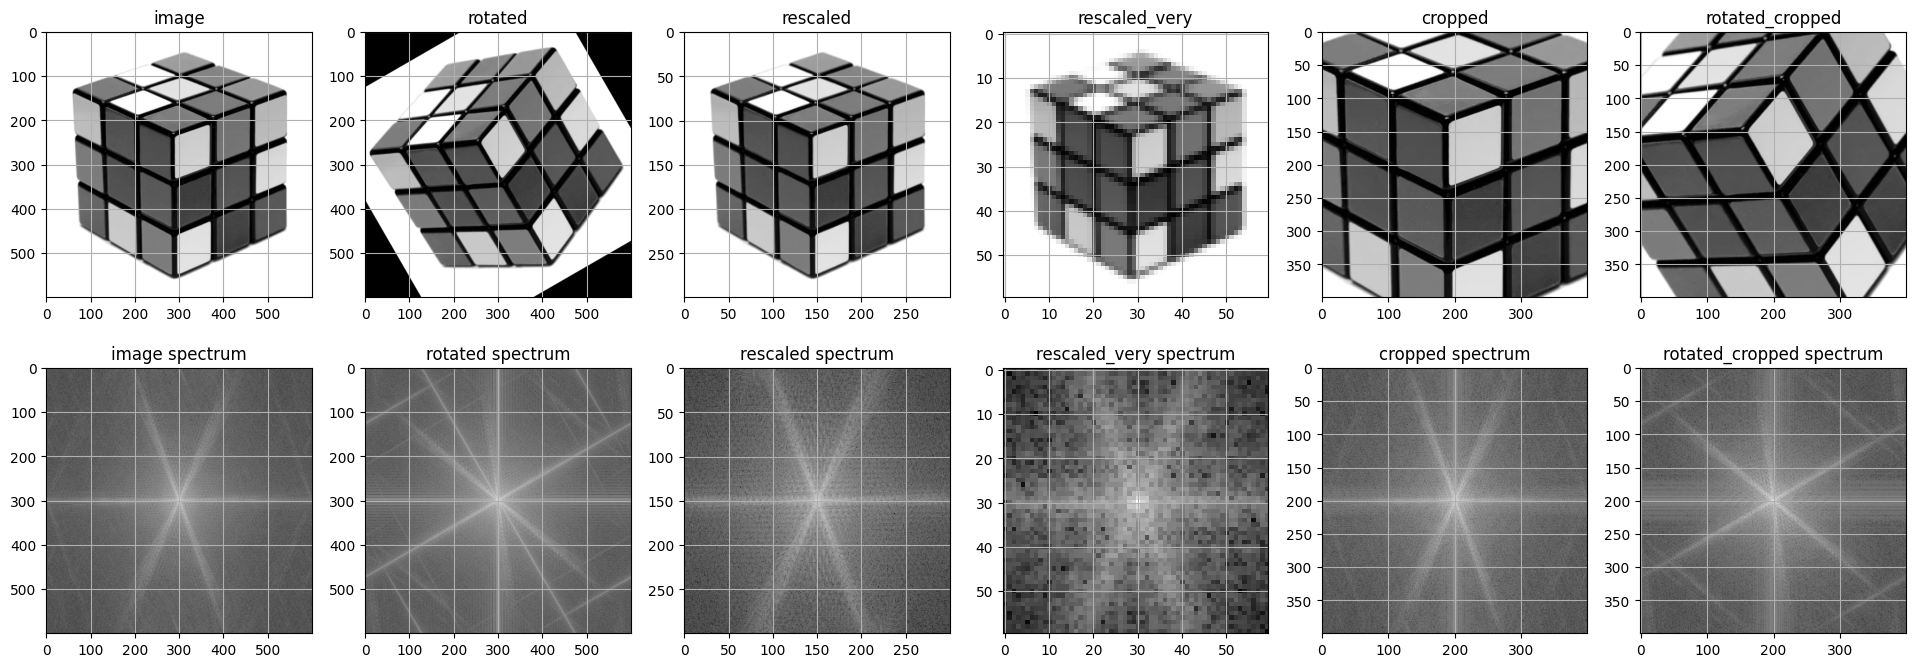

In [14]:
rubik = imread('../images/rubik.webp')
play_with_source_image(rubik)

Trzy charakterystyczne linie odpowiadają trzem kierunkom krawędzi.

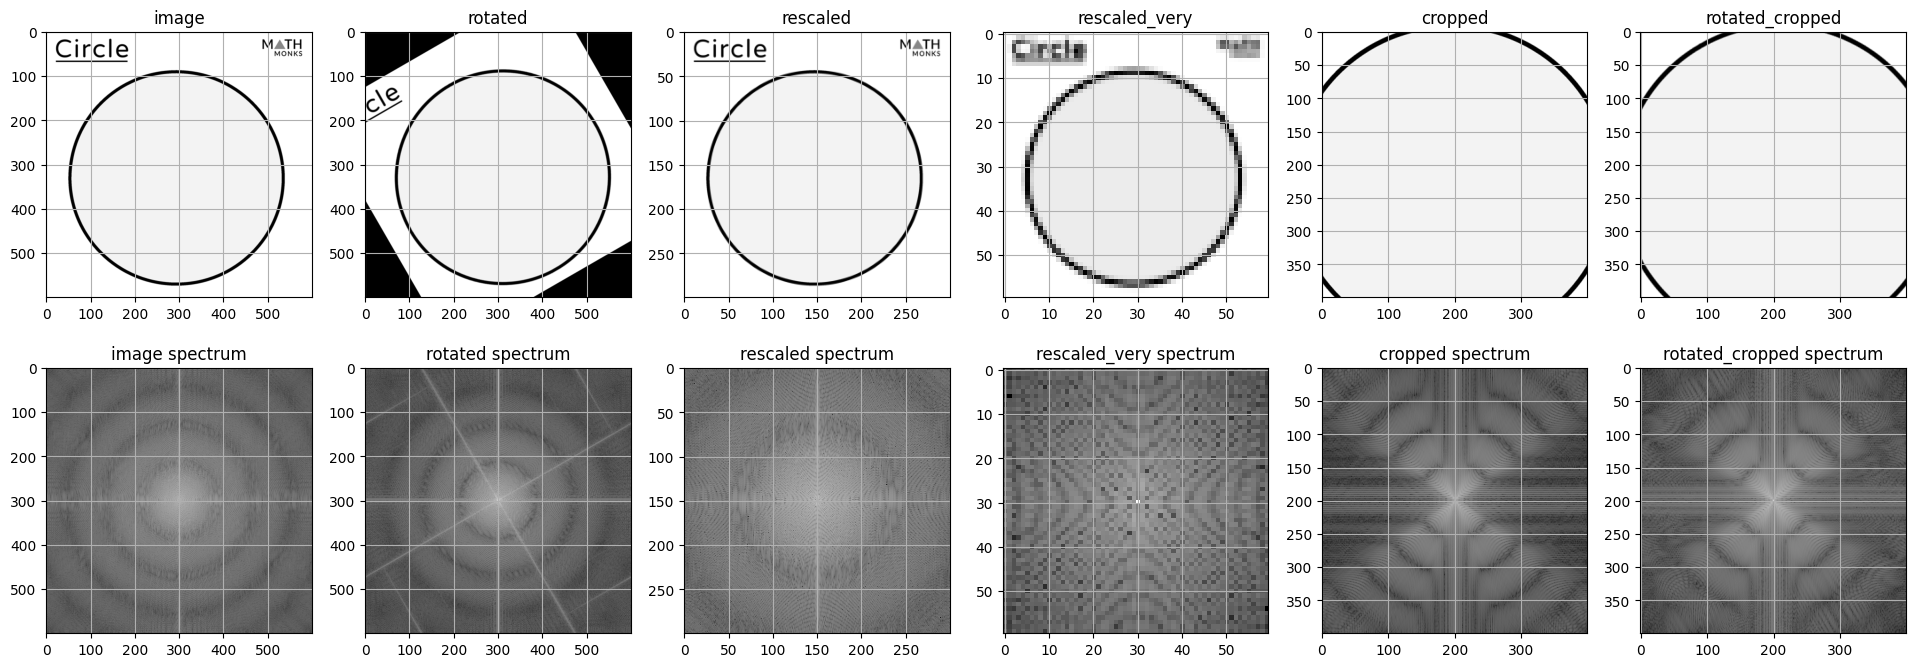

In [15]:
circle = imread('../images/circle.jpg')
play_with_source_image(circle)

Brak mocno zaznaczonych linii prostopadłych = koło nie ma boków.

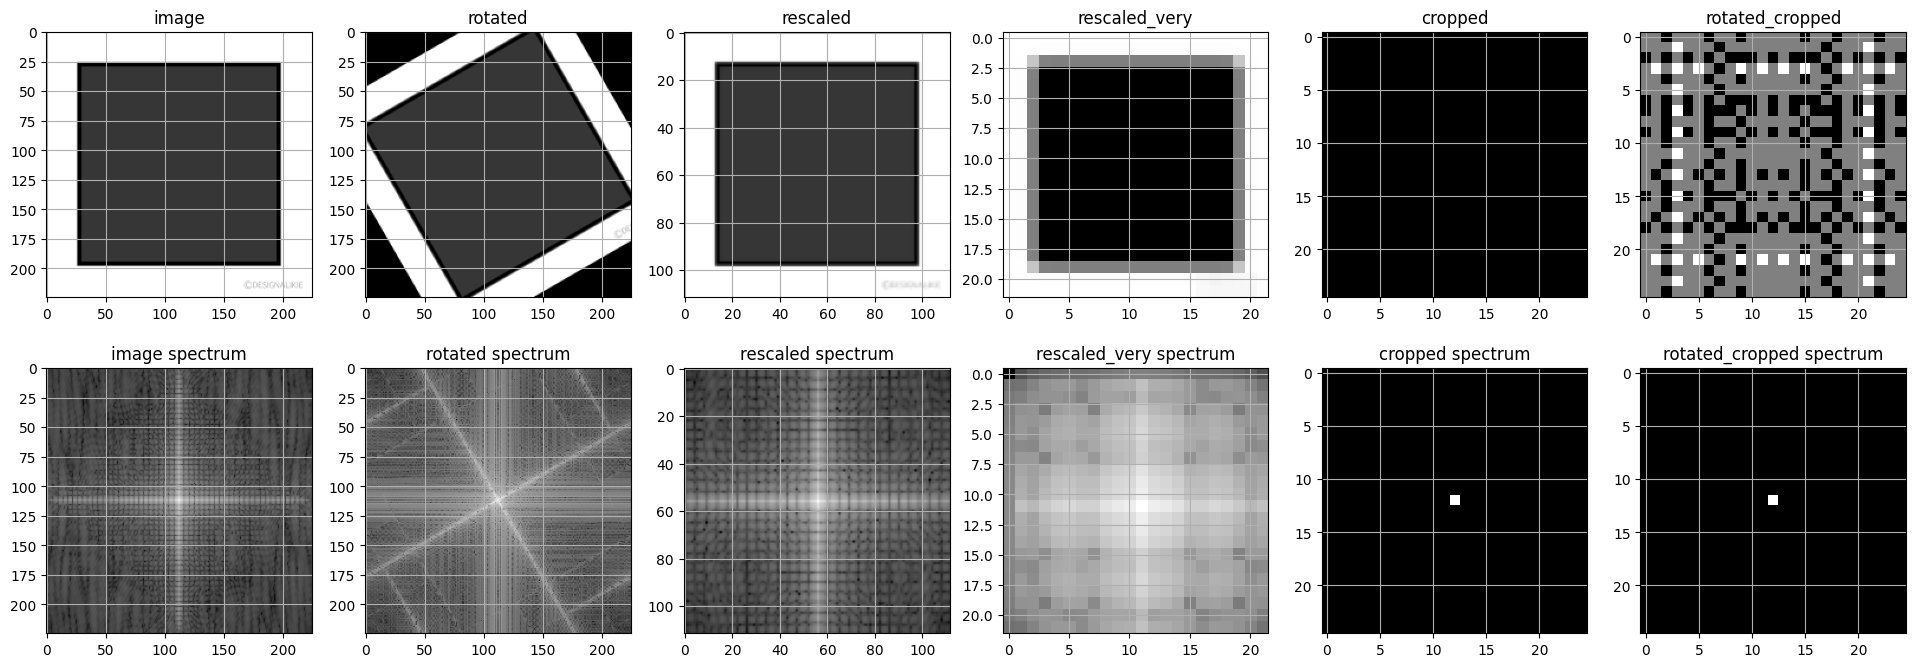

In [16]:
square = imread('../images/square.png')
play_with_source_image(square)

Mocno zaznaczone prostopadłe linie - boki kwadratu.

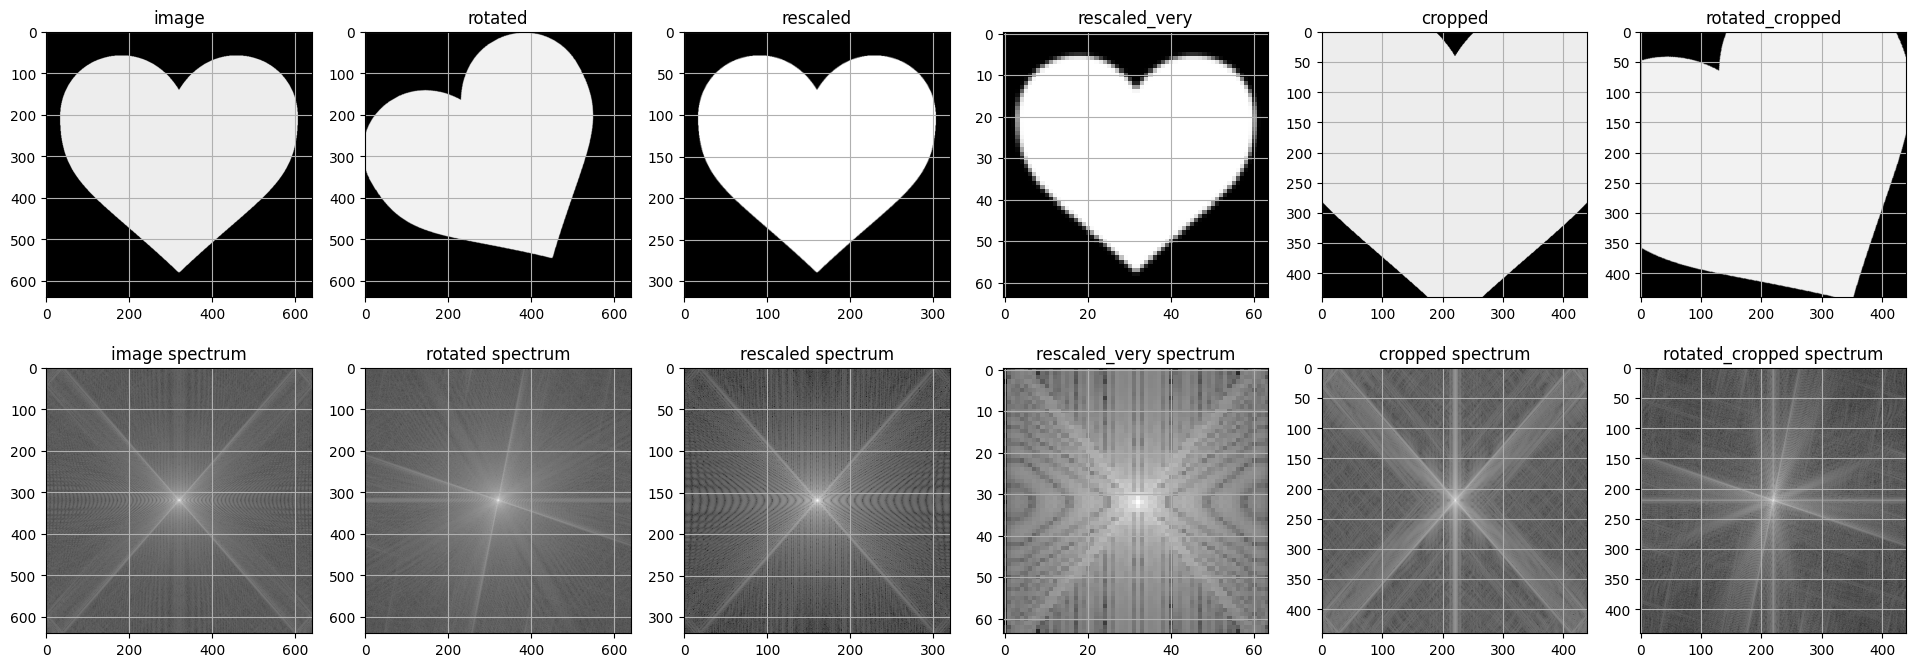

In [17]:
heart = imread('../images/heart.webp')[...,:3]
play_with_source_image(heart)

Linie pod kątem odpowiadają bokom serca.

Obserwacje:
- jakosc zdjęcia ma duże znaczenie, spektra *rescaled* wyglądają znacznie inaczej.
- obracanie wprowadza dodatkowe linie na spektrum - być może jest to efekt niedoskonałosci obracania? to byłoby ciekawe, ale wymagałoby dalszej eksploracji

# Czy ma znaczenie czym wypełniamy maskę?

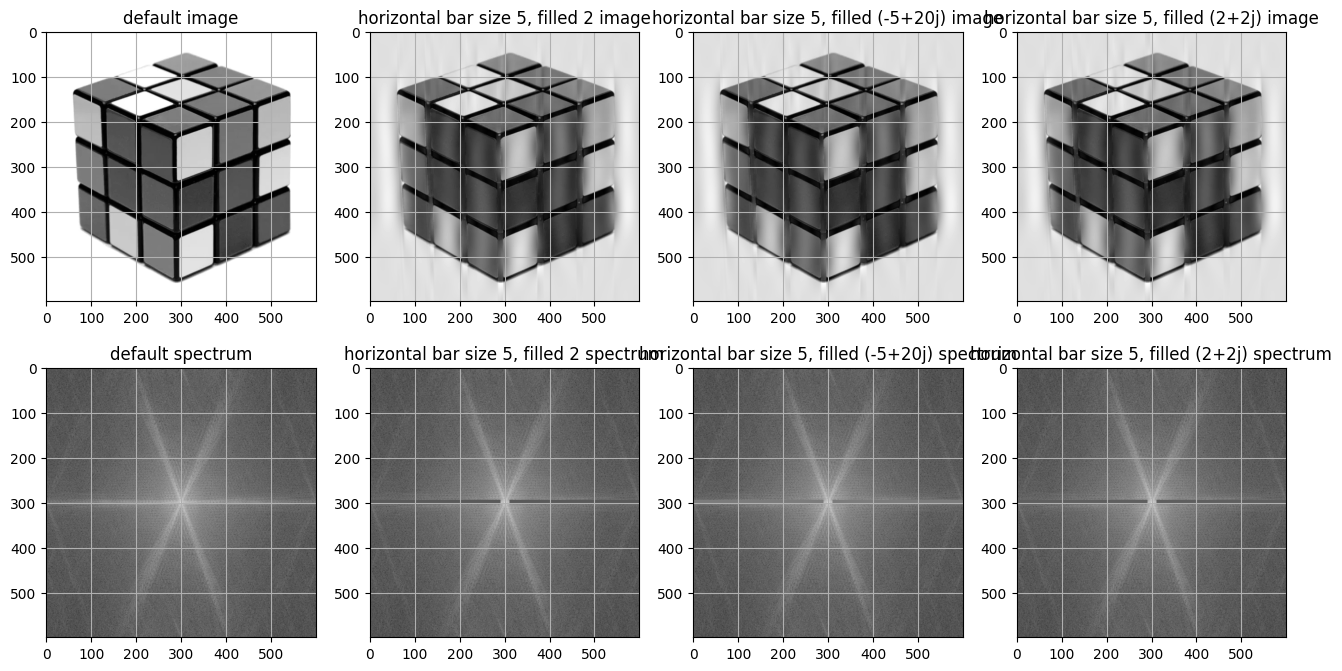

In [18]:
cube =  rgb2gray(imread('../images/rubik.webp'))
plot_spectrum_transformations_compact(cube, 'gray', get_horizontal_bar_transformation(filler=2, crop_center=10),get_horizontal_bar_transformation(filler=20j-5, crop_center=10),get_horizontal_bar_transformation(filler=2j+2, crop_center=10))

Nie xd Dlaczego? To matematycznie trzeba by rozważyć jak to wpływa na transformatę.
Btw - wpływamy na krawędzie pionowe, nie ruszamy srodka - o srodku zaraz wiecej.

# Luźna zabawa

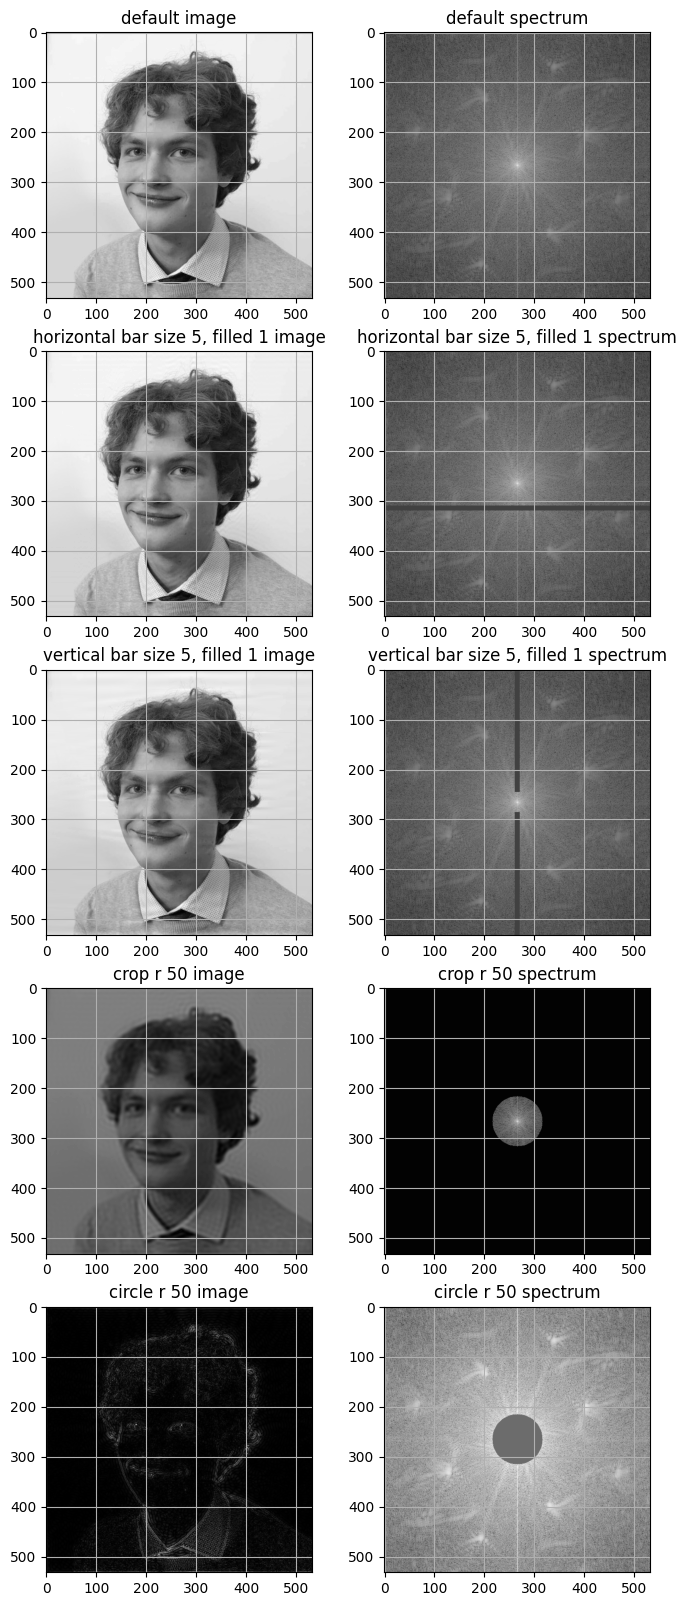

In [19]:
plot_spectrum_transformations(rgb2gray(image), 'gray', get_horizontal_bar_transformation(shift=50), get_vertical_bar_transformation(crop_center=20), get_crop_transformation(radius=50), get_circle_transformation(radius=50))

Ostatnie przerażające. Zastanówmy się na co wpływają okręgi - wycinanie wnetrza i wycinanie zewnetrza.

# Co się kryje w srodku?

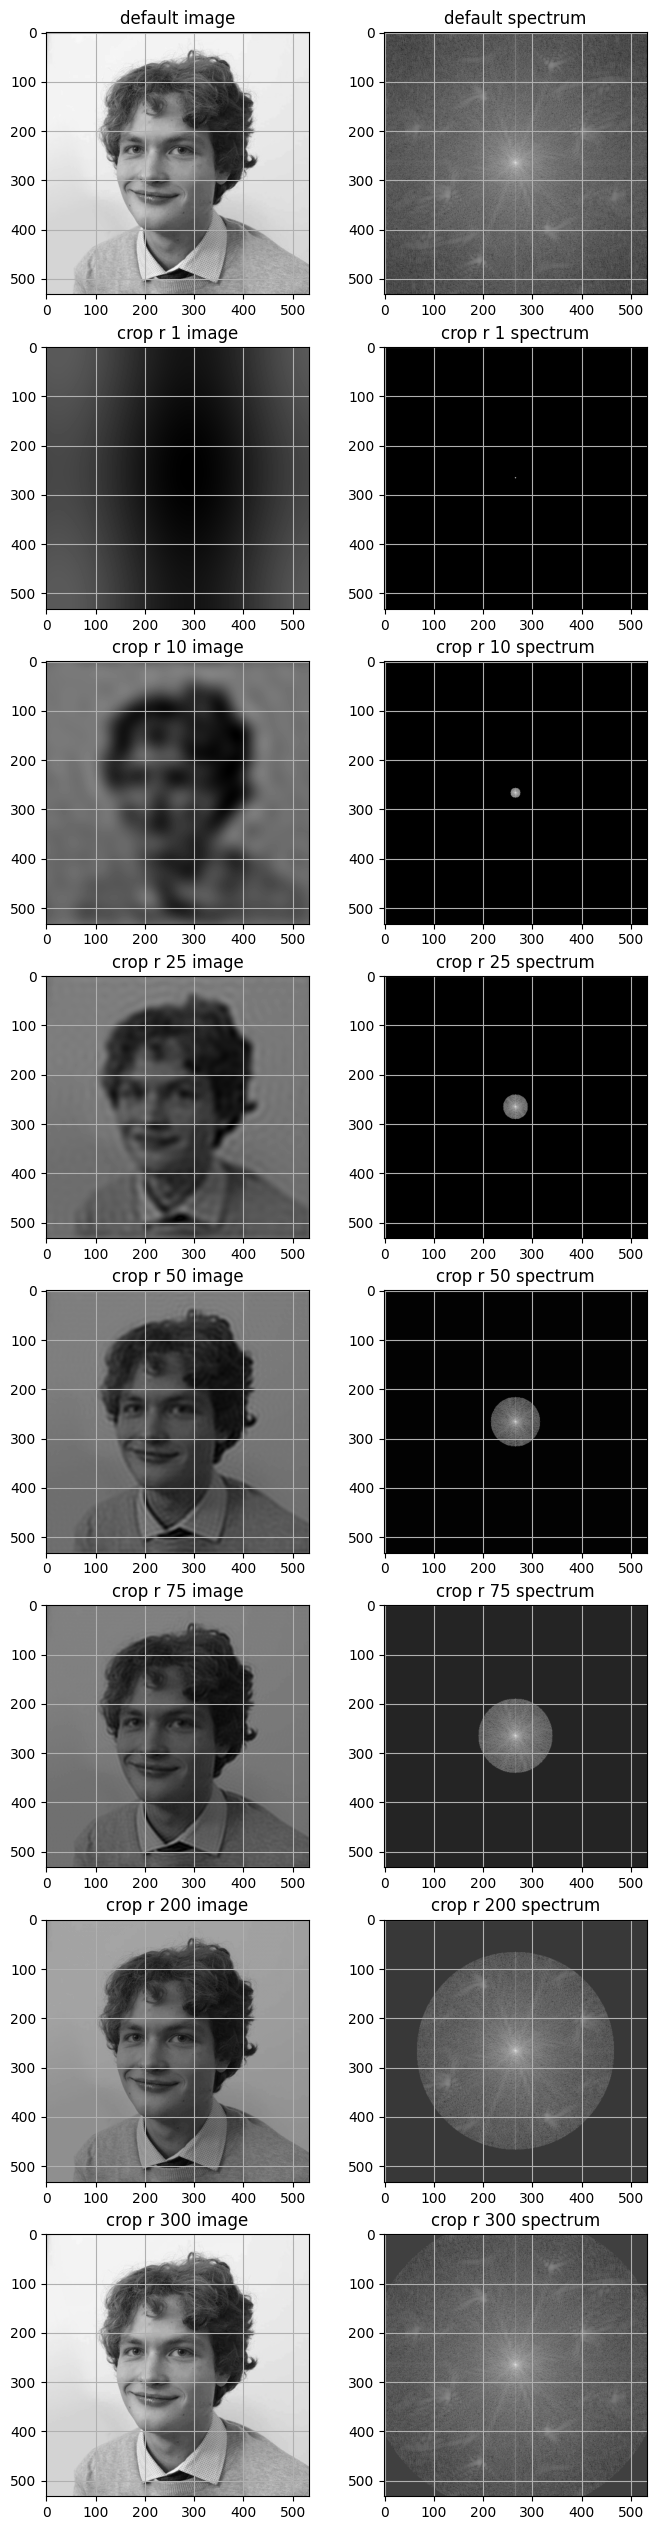

In [20]:
image = imread('../images/id_borkowski.jpg')
plot_spectrum_transformations(rgb2gray(image), 'gray', get_crop_transformation(radius=1), get_crop_transformation(radius=10), get_crop_transformation(radius=25), get_crop_transformation(radius=50), get_crop_transformation(radius=75), get_crop_transformation(radius=200), get_crop_transformation(radius=300))

Sam srodek - rozklad natezenia (koloru)
W miare rozszerzania - niewyrazny, ogolny ksztalt, ciemny
Oryginalny obraz - jasniejszy

# A co jak wytniemy srodek?

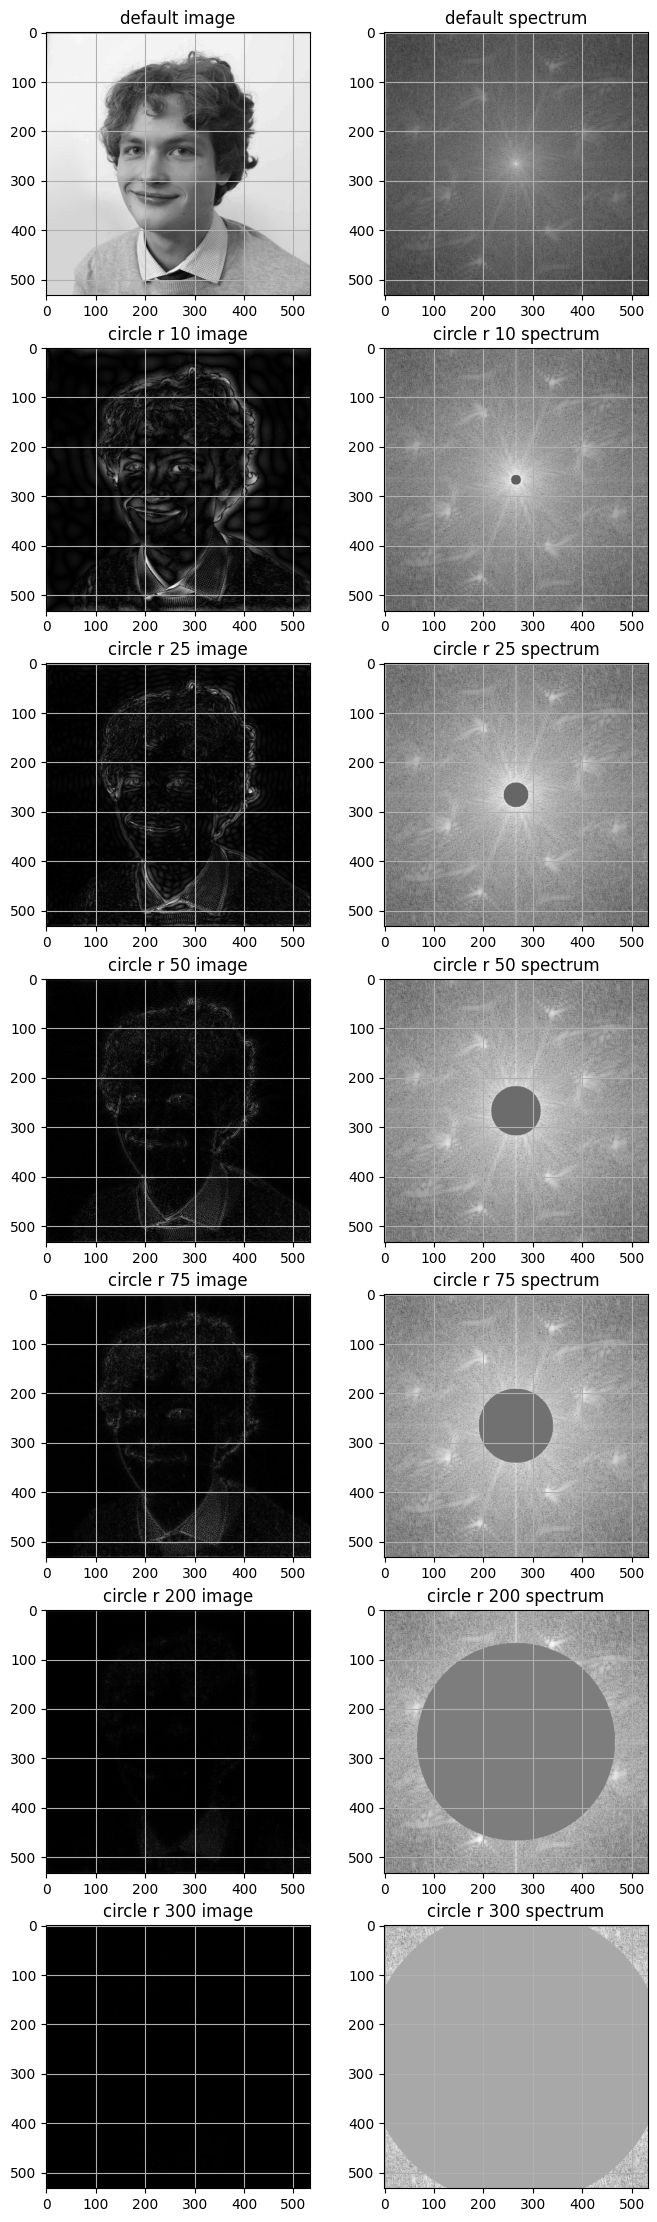

In [21]:
image = imread('../images/id_borkowski.jpg')
plot_spectrum_transformations(rgb2gray(image), 'gray', get_circle_transformation(radius=10), get_circle_transformation(radius=25),
                              get_circle_transformation(radius=50), get_circle_transformation(radius=75),
                              get_circle_transformation(radius=200), get_circle_transformation(radius=300))

No mamy eleganckie krawedzie, bez kolorow. Bardzo straszne te zdjecia.

Celowana modyfikacja spektrum

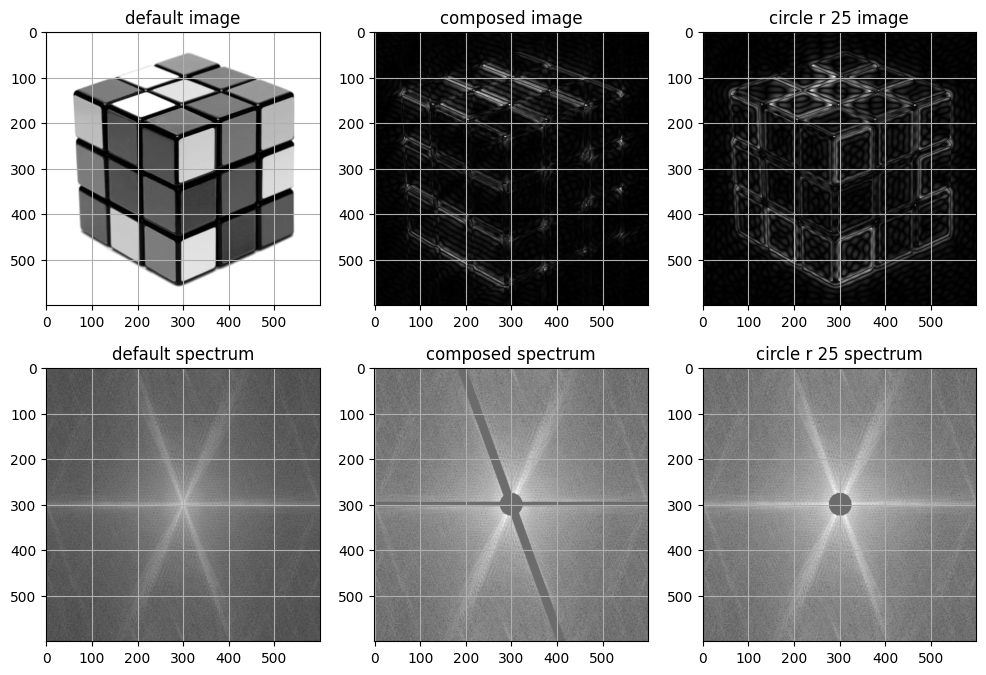

In [22]:
plot_spectrum_transformations_compact(cube, 'gray', compose_transformations(get_horizontal_bar_transformation(crop_center=20), get_rotated_bar_transformation(size=10, angle=20), get_circle_transformation(radius=25)), get_circle_transformation(radius=25))

Usuwamy krawedzie w dwoch z trzech kierunkow.

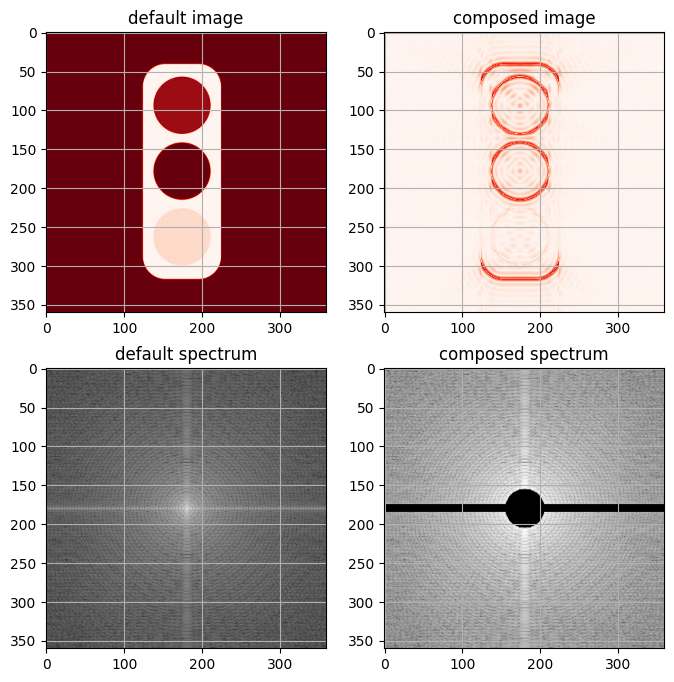

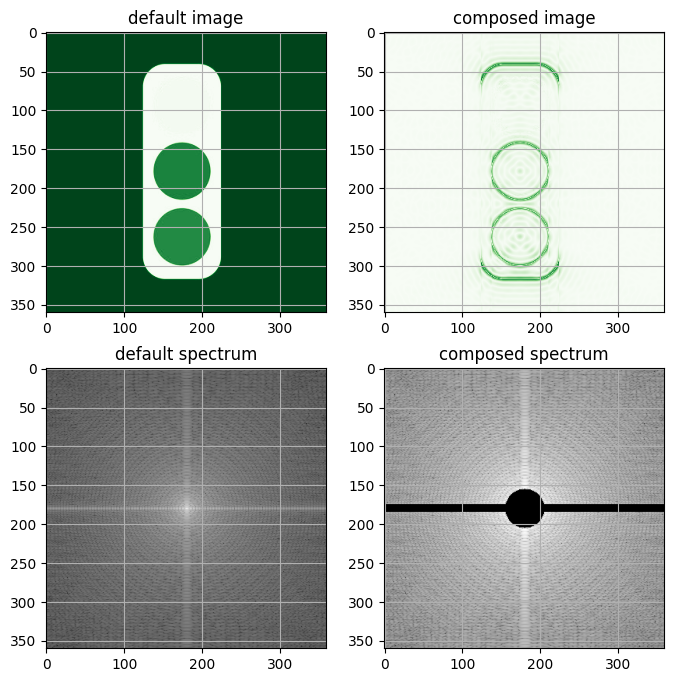

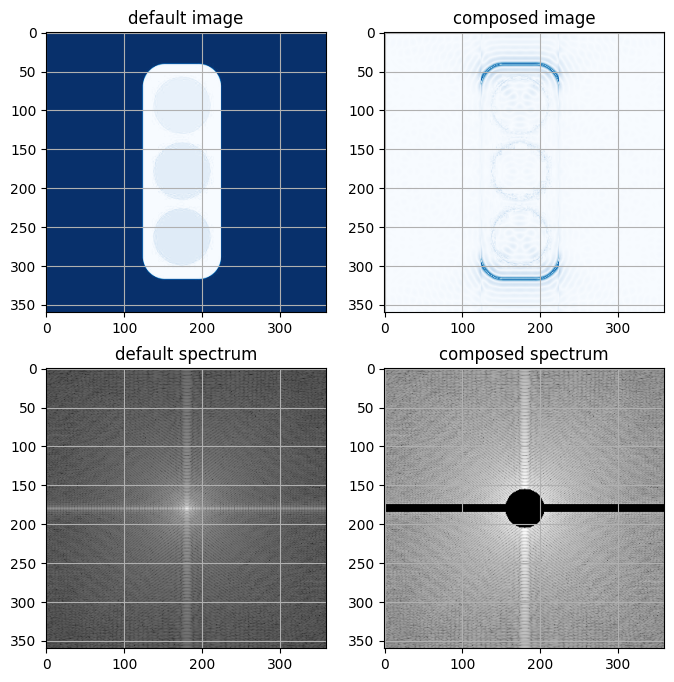

In [23]:
colors = ['Reds', 'Greens', 'Blues']
for i in range(3):
    plot_spectrum_transformations_compact(traffic[:,:,i], colors[i], compose_transformations(get_circle_transformation(radius=25), get_horizontal_bar_transformation()))

Usuwamy krawedzie pionowe.